In [1]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight

In [70]:
fish_data=[[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target=[1]*35 + [0]*14

In [62]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(fish_data, fish_target)
kn.score(fish_data, fish_target)

1.0

In [63]:
kn.predict([[30,600]])

array([1])

In [65]:
kn49=KNeighborsClassifier(n_neighbors=49)

In [66]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [40]:
train_input=fish_data[:35]
train_target=fish_target[:35]

test_input=fish_data[35:]
test_target=fish_target[35:]

In [67]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [71]:
import numpy as np
input_arr=np.array(fish_data)
target_arr=np.array(fish_target)

In [76]:
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [72]:
np.random.seed(42)
index=np.arange(49)
np.random.shuffle(index)

In [45]:
train_input=input_arr[index[:35]]
train_target=target_arr[index[:35]]

test_input=input_arr[index[35:]]
test_target=target_arr[index[35:]]

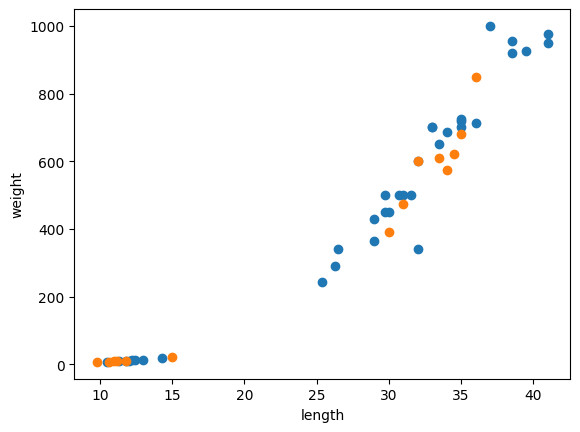

In [73]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [74]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [3]:
import numpy as np

In [50]:
fish_data=np.column_stack((fish_length, fish_weight))
fish_target=np.concatenate((np.ones(35), np.zeros(14)))

In [51]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target=train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)





1.0

In [53]:
print(kn.predict([[25,150]]))


[0.]


In [54]:
disttances, indexes = kn.kneighbors([[25,150]])
indexes


array([[21, 33, 19, 30,  1]], dtype=int64)

In [55]:
train_input[7]

array([ 36., 850.])

In [47]:
train_input[indexes,0]

array([[37. , 41. , 38.5, 39.5, 36. ]])

In [48]:
train_input[indexes,1]

array([[1000.,  975.,  955.,  925.,  850.]])

Text(0, 0.5, 'height')

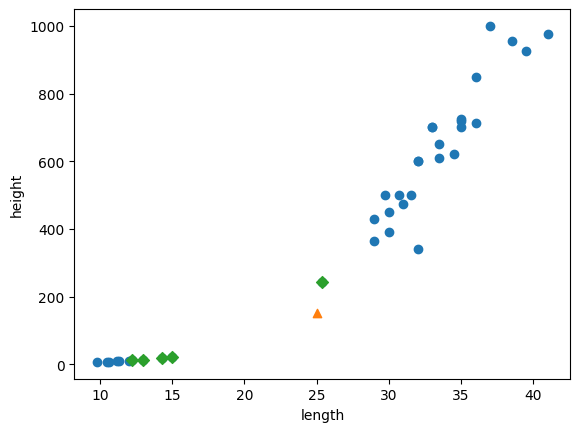

In [61]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('height')


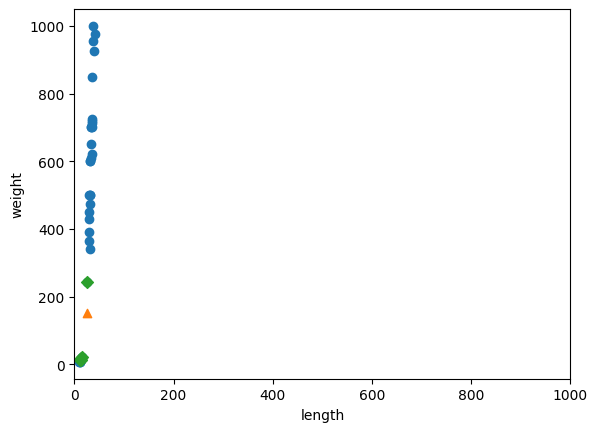

In [57]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [22]:
mean=np.mean(train_input, axis=0)
std=np.std(train_input, axis=0)

print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [23]:
train_scaled = (train_input-mean)/std

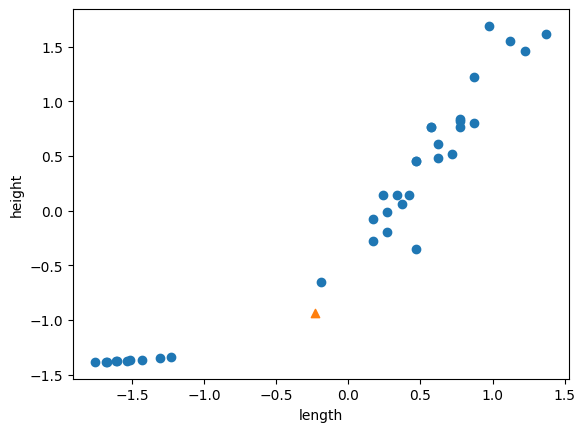

In [24]:
new=([25,150]-mean)/std

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('height')
plt.show()

In [25]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [26]:
test_scaled=(test_input-mean)/std
kn.score(test_scaled, test_target)

1.0

In [27]:
print(kn.predict([new]))

[1.]


In [35]:
distances, indexes=kn.kneighbors([new])
indexes

array([[21, 14, 34, 32,  5]], dtype=int64)

In [36]:
train_scaled[14]

array([ 0.17057727, -0.28177396])

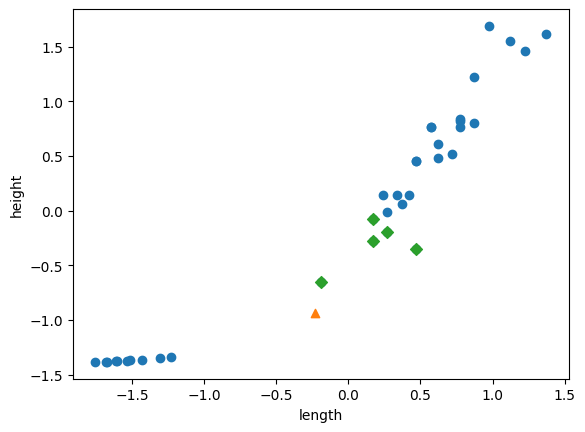

In [32]:
plt.scatter(train_scaled[:, 0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('height')
plt.show()

In [12]:
import numpy as np

In [13]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [14]:
import matplotlib.pyplot as plt

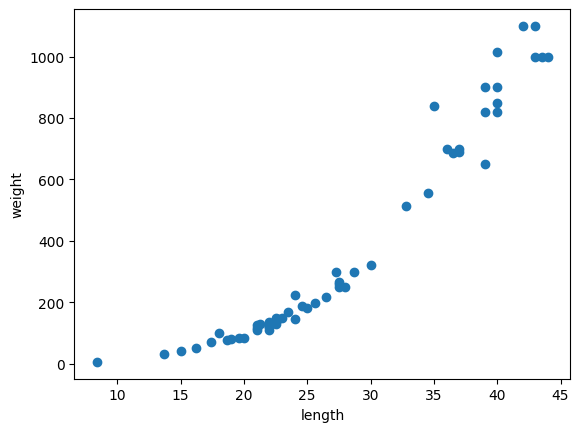

In [15]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

In [29]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [30]:
from sklearn.neighbors import KNeighborsRegressor

In [31]:
knr=KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [32]:
knr.score(test_input, test_target)

0.992809406101064

In [33]:
from sklearn.metrics import mean_absolute_error

In [34]:
test_prediction=knr.predict(test_input)
mae=mean_absolute_error(test_target,test_prediction)
print(mae)

19.157142857142862


In [35]:
knr.score(train_input, train_target)

0.9698823289099254

In [36]:
knr.score(test_input, test_target)

0.992809406101064

In [37]:
knr.n_neighbors=3
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [38]:
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609
